## Base INPE
### Análise - Focos de Queimada x Supressão da vegetação nativa

In [52]:
import pandas as pd

# Substitua pelo caminho para o seu arquivo
file_path = "dashboard-fires-month-26-01-2025-22_51_22_CORRIGIDO.csv"

# Carregar o arquivo Excel
data = pd.read_csv(file_path)

# Exibir as primeiras linhas para explorar o conteúdo
print(data.head())

      date                                      class  focuses         uf
0  2020/05                       Fogo em outras áreas        1  TOCANTINS
1  2018/09  Fogo em áreas de desmatamento consolidado      554  TOCANTINS
2  2018/08          Fogo em áreas de vegetação nativa      759  TOCANTINS
3  2018/09      Fogo em áreas de desmatamento recente      299  TOCANTINS
4  2018/08                       Fogo em outras áreas        5  TOCANTINS


In [53]:
# Informações gerais sobre as colunas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8866 entries, 0 to 8865
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     8866 non-null   object
 1   class    8866 non-null   object
 2   focuses  8866 non-null   int64 
 3   uf       8866 non-null   object
dtypes: int64(1), object(3)
memory usage: 277.2+ KB
None


In [54]:
# Verificar estatísticas descritivas
print(data.describe())

           focuses
count  8866.000000
mean    155.488044
std     463.473159
min       1.000000
25%       4.000000
50%      19.000000
75%      89.000000
max    6622.000000


C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_1672\437928461.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=focos_estado.index, y=focos_estado.values, palette="coolwarm")


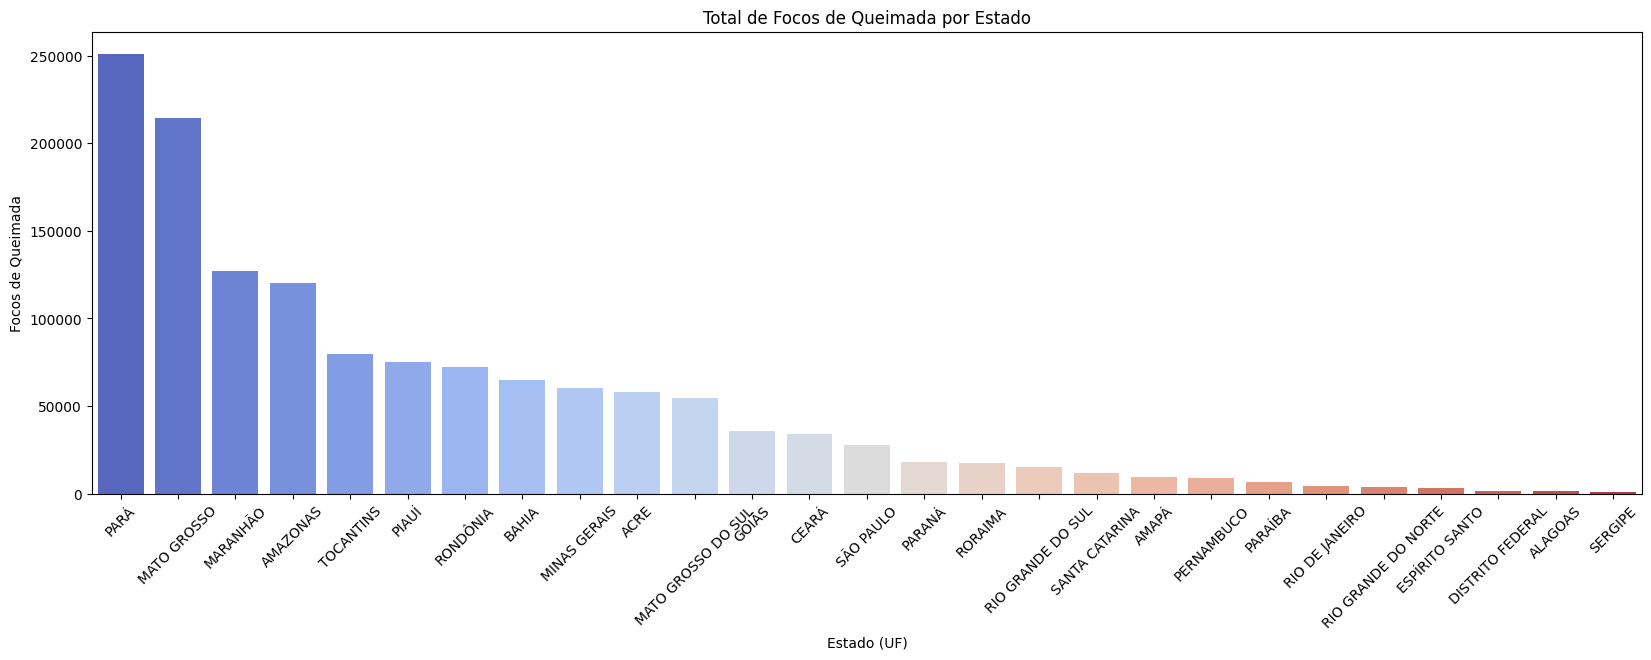

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total de focos por estado
focos_estado = data.groupby("uf")["focuses"].sum().sort_values(ascending=False)

# Plotar gráfico
plt.figure(figsize=(20, 6))
sns.barplot(x=focos_estado.index, y=focos_estado.values, palette="coolwarm")
plt.title("Total de Focos de Queimada por Estado")
plt.xlabel("Estado (UF)")
plt.ylabel("Focos de Queimada")
plt.xticks(rotation=45)
plt.show()

C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_1672\3262154933.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=focos_tipo.index, y=focos_tipo.values, palette="viridis")


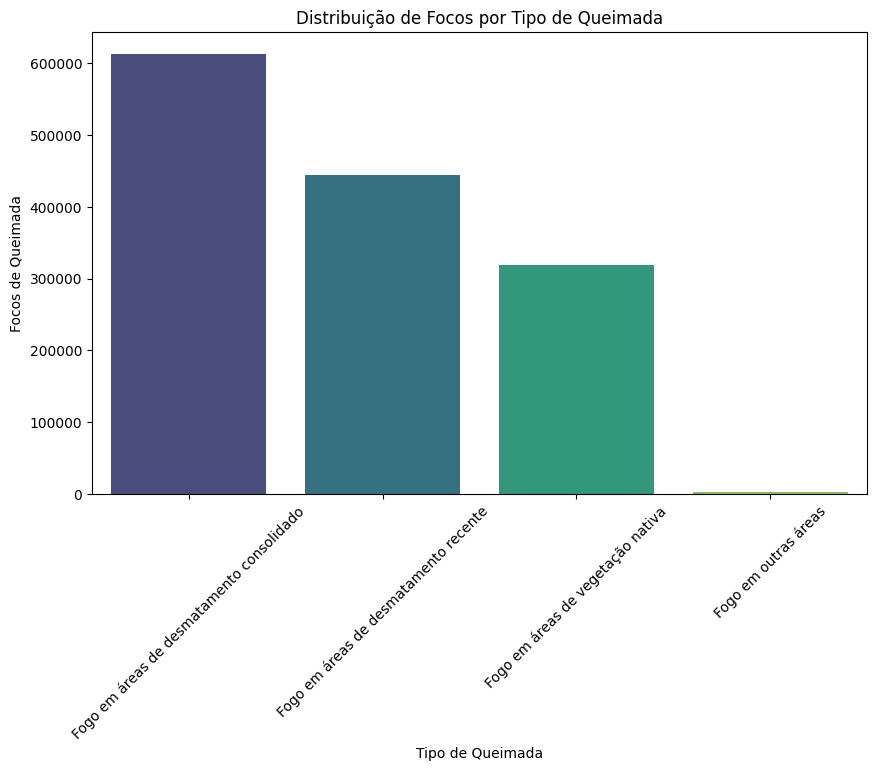

In [59]:
# Total de focos por tipo de queimada
focos_tipo = data.groupby("class")["focuses"].sum().sort_values(ascending=False)

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=focos_tipo.index, y=focos_tipo.values, palette="viridis")
plt.title("Distribuição de Focos por Tipo de Queimada")
plt.xlabel("Tipo de Queimada")
plt.ylabel("Focos de Queimada")
plt.xticks(rotation=45)
plt.show()

C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_1672\3956926911.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["date"] = pd.to_datetime(data["date"])


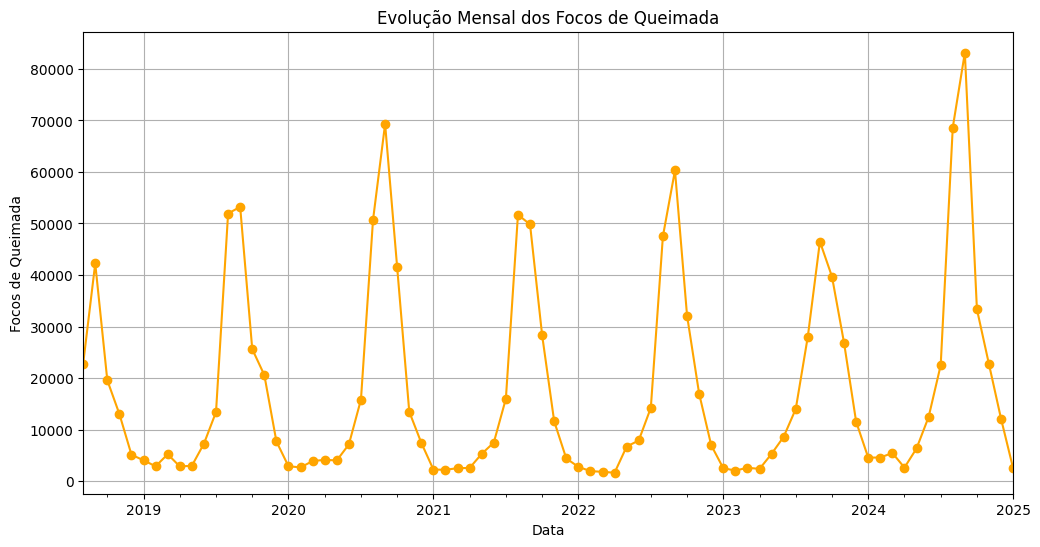

In [61]:
# Converter a coluna de data para formato datetime
data["date"] = pd.to_datetime(data["date"])

# Agrupar por mês e somar os focos
focos_tempo = data.groupby(data["date"].dt.to_period("M"))["focuses"].sum()

# Plotar série temporal
plt.figure(figsize=(12, 6))
focos_tempo.plot(kind="line", marker="o", color="orange")
plt.title("Evolução Mensal dos Focos de Queimada")
plt.xlabel("Data")
plt.ylabel("Focos de Queimada")
plt.grid()
plt.show()

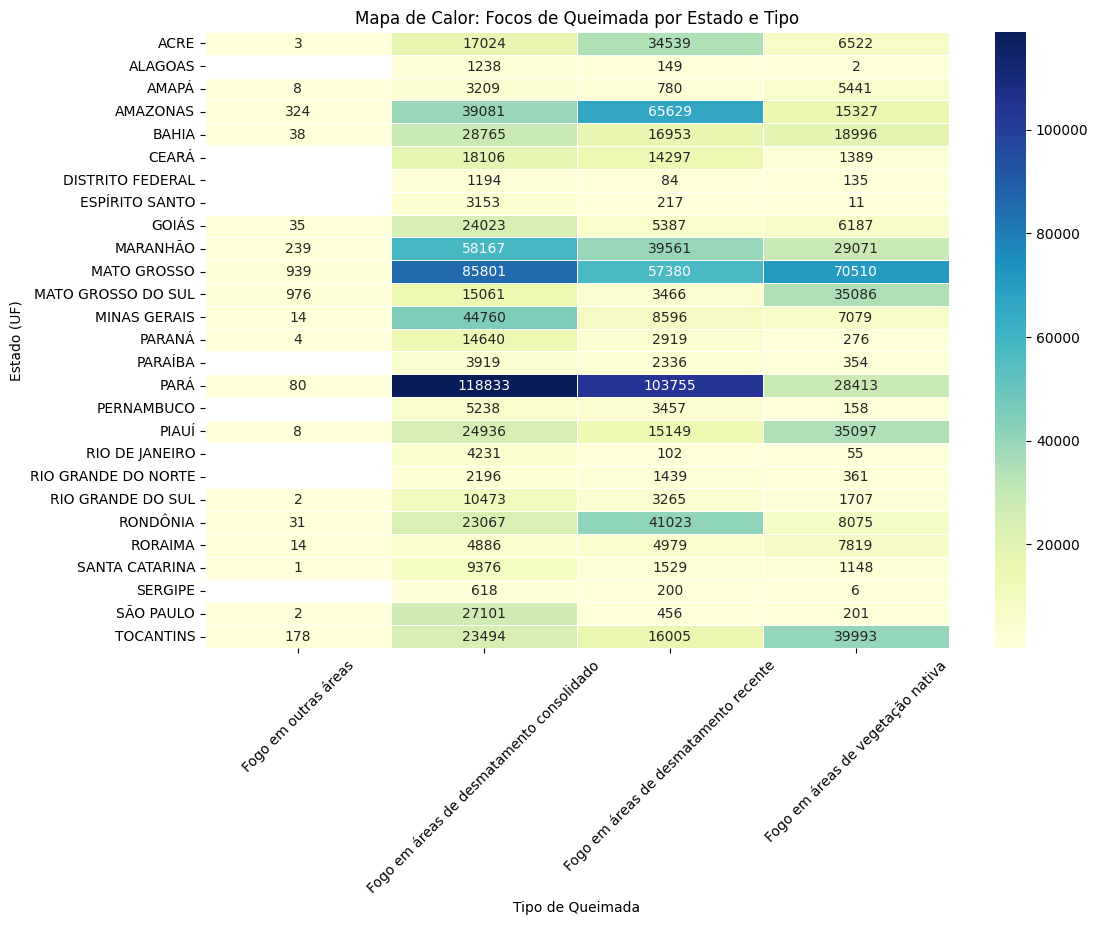

In [63]:
# Criar uma tabela dinâmica
heatmap_data = data.pivot_table(index="uf", columns="class", values="focuses", aggfunc="sum")

# Plotar mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Mapa de Calor: Focos de Queimada por Estado e Tipo")
plt.xlabel("Tipo de Queimada")
plt.xticks(rotation=45)
plt.ylabel("Estado (UF)")
plt.show()

#### Variáveis principais:


Classe: Tipo de vegetação (Primária e Secundária).

Ano: Anos de 1986 a 2023.

Desmatamento: Quantidade de desmatamento em hectares por ano para cada tipo de vegetação.

#### Características:

O desmatamento é categorizado em dois tipos de vegetação (primária e secundária), permitindo comparações entre eles.

O período de 1986 a 2023 oferece uma linha do tempo longa, permitindo observar as mudanças nas taxas de desmatamento.

A relação entre desmatamento e vegetação oferece insights sobre quais áreas são mais vulneráveis ao desmatamento.

#### Insights:

Análise de estados ou classes que têm maior incidência de queimadas. Avaliação de tendências sazonais ou regionais.

## Base SEEG
### Análise - Emissões de Gases de Efeito Estufa

In [83]:
import pandas as pd

# Substitua pelo caminho para o seu arquivo
file_path = "SEEG.csv"

# Carregar o arquivo Excel
data = pd.read_csv(file_path)

# Exibir as primeiras linhas para explorar o conteúdo
print(data.head())

      Categoria          1990          1991          1992          1993  \
0          Pará  3.713604e+08  3.456612e+08  4.887939e+08  3.903480e+08   
1   Mato Grosso  2.991454e+08  3.080704e+08  4.123194e+08  3.959249e+08   
2      Maranhão  1.551959e+08  1.437850e+08  2.037116e+08  1.642882e+08   
3  Minas Gerais  1.718919e+08  1.803260e+08  1.676099e+08  1.711714e+08   
4     São Paulo  1.188844e+08  1.254230e+08  1.220580e+08  1.254794e+08   

           1994          1995          1996          1997          1998  ...  \
0  4.096926e+08  5.709845e+08  4.608000e+08  5.624068e+08  4.809973e+08  ...   
1  5.462023e+08  6.462798e+08  5.358809e+08  5.237706e+08  5.331691e+08  ...   
2  1.526168e+08  1.432679e+08  1.394976e+08  1.288871e+08  1.897565e+08  ...   
3  1.590313e+08  1.647119e+08  1.593408e+08  1.634456e+08  1.568034e+08  ...   
4  1.377703e+08  1.401017e+08  1.388923e+08  1.400873e+08  1.409485e+08  ...   

           2014          2015          2016          2017          2

In [84]:
# Informações gerais sobre as colunas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Categoria  28 non-null     object 
 1   1990       28 non-null     float64
 2   1991       28 non-null     float64
 3   1992       28 non-null     float64
 4   1993       28 non-null     float64
 5   1994       28 non-null     float64
 6   1995       28 non-null     float64
 7   1996       28 non-null     float64
 8   1997       28 non-null     float64
 9   1998       28 non-null     float64
 10  1999       28 non-null     float64
 11  2000       28 non-null     float64
 12  2001       28 non-null     float64
 13  2002       28 non-null     float64
 14  2003       28 non-null     float64
 15  2004       28 non-null     float64
 16  2005       28 non-null     float64
 17  2006       28 non-null     float64
 18  2007       28 non-null     float64
 19  2008       28 non-null     float64
 20  2009       2

In [85]:
# Verificar estatísticas descritivas
print(data.describe())

               1990          1991          1992          1993          1994  \
count  2.800000e+01  2.800000e+01  2.800000e+01  2.800000e+01  2.800000e+01   
mean   7.553158e+07  7.698137e+07  8.894892e+07  8.212199e+07  8.911535e+07   
std    8.994392e+07  8.792785e+07  1.174540e+08  1.027491e+08  1.238105e+08   
min    3.035022e+06  1.581342e+06  2.945904e+06  2.805204e+06  3.246562e+06   
25%    1.467818e+07  1.381961e+07  1.647843e+07  1.469508e+07  1.519463e+07   
50%    3.621994e+07  3.817298e+07  3.628183e+07  3.651667e+07  3.818994e+07   
75%    1.076038e+08  1.137593e+08  1.148660e+08  1.105780e+08  1.088965e+08   
max    3.713604e+08  3.456612e+08  4.887939e+08  3.959249e+08  5.462023e+08   

               1995          1996          1997          1998          1999  \
count  2.800000e+01  2.800000e+01  2.800000e+01  2.800000e+01  2.800000e+01   
mean   1.020657e+08  9.141269e+07  9.218887e+07  9.064879e+07  9.034949e+07   
std    1.554490e+08  1.283150e+08  1.366100e+08  1.

In [86]:
# Transpor para formato longo
data_long = data.melt(id_vars=["Categoria"], 
                      var_name="Ano", 
                      value_name="Emissao")

# Converter Ano e Emissao para tipos adequados
data_long["Ano"] = pd.to_numeric(data_long["Ano"])
data_long["Emissao"] = pd.to_numeric(data_long["Emissao"], errors="coerce")

# Verificar os primeiros registros após a transformação
print(data_long.head())

      Categoria   Ano       Emissao
0          Pará  1990  3.713604e+08
1   Mato Grosso  1990  2.991454e+08
2      Maranhão  1990  1.551959e+08
3  Minas Gerais  1990  1.718919e+08
4     São Paulo  1990  1.188844e+08


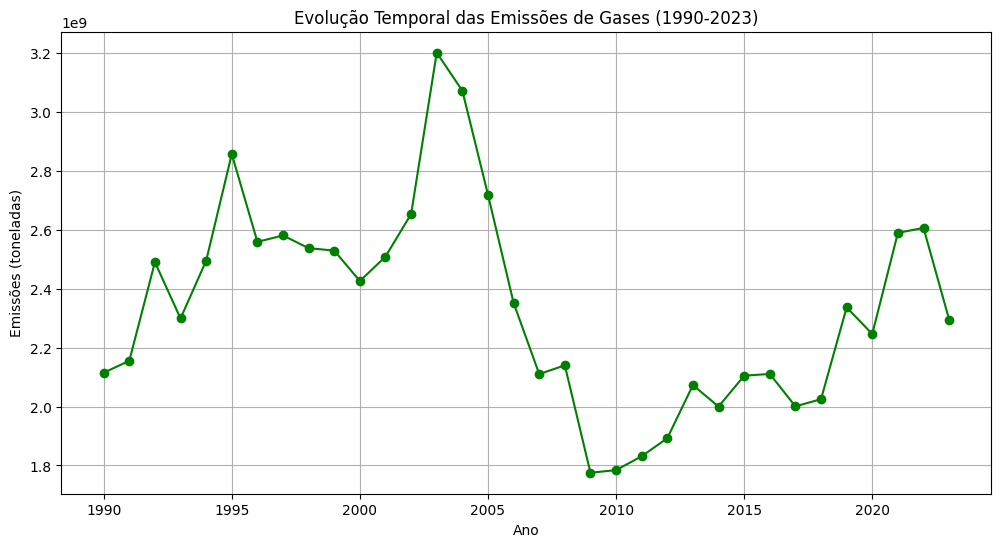

In [87]:
# Agrupar por ano e somar emissões
emissao_tempo = data_long.groupby("Ano")["Emissao"].sum()

# Plotar gráfico de linha
plt.figure(figsize=(12, 6))
emissao_tempo.plot(kind="line", marker="o", color="green")
plt.title("Evolução Temporal das Emissões de Gases (1990-2023)")
plt.xlabel("Ano")
plt.ylabel("Emissões (toneladas)")
plt.grid()
plt.show()

C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_1672\2934861351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emissao_estado.index, y=emissao_estado.values, palette="coolwarm")


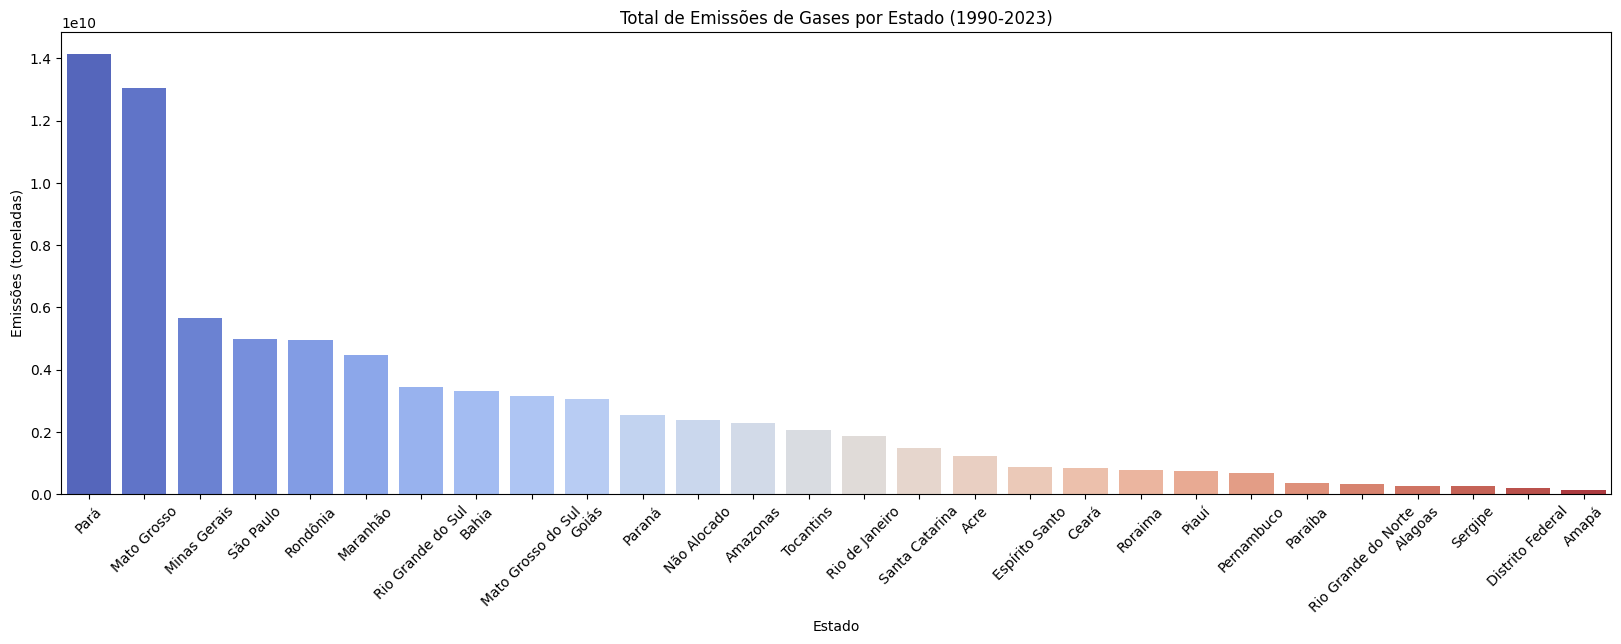

In [88]:
# Total de emissões por estado
emissao_estado = data_long.groupby("Categoria")["Emissao"].sum().sort_values(ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(20, 6))
sns.barplot(x=emissao_estado.index, y=emissao_estado.values, palette="coolwarm")
plt.title("Total de Emissões de Gases por Estado (1990-2023)")
plt.xlabel("Estado")
plt.ylabel("Emissões (toneladas)")
plt.xticks(rotation=45)
plt.show()

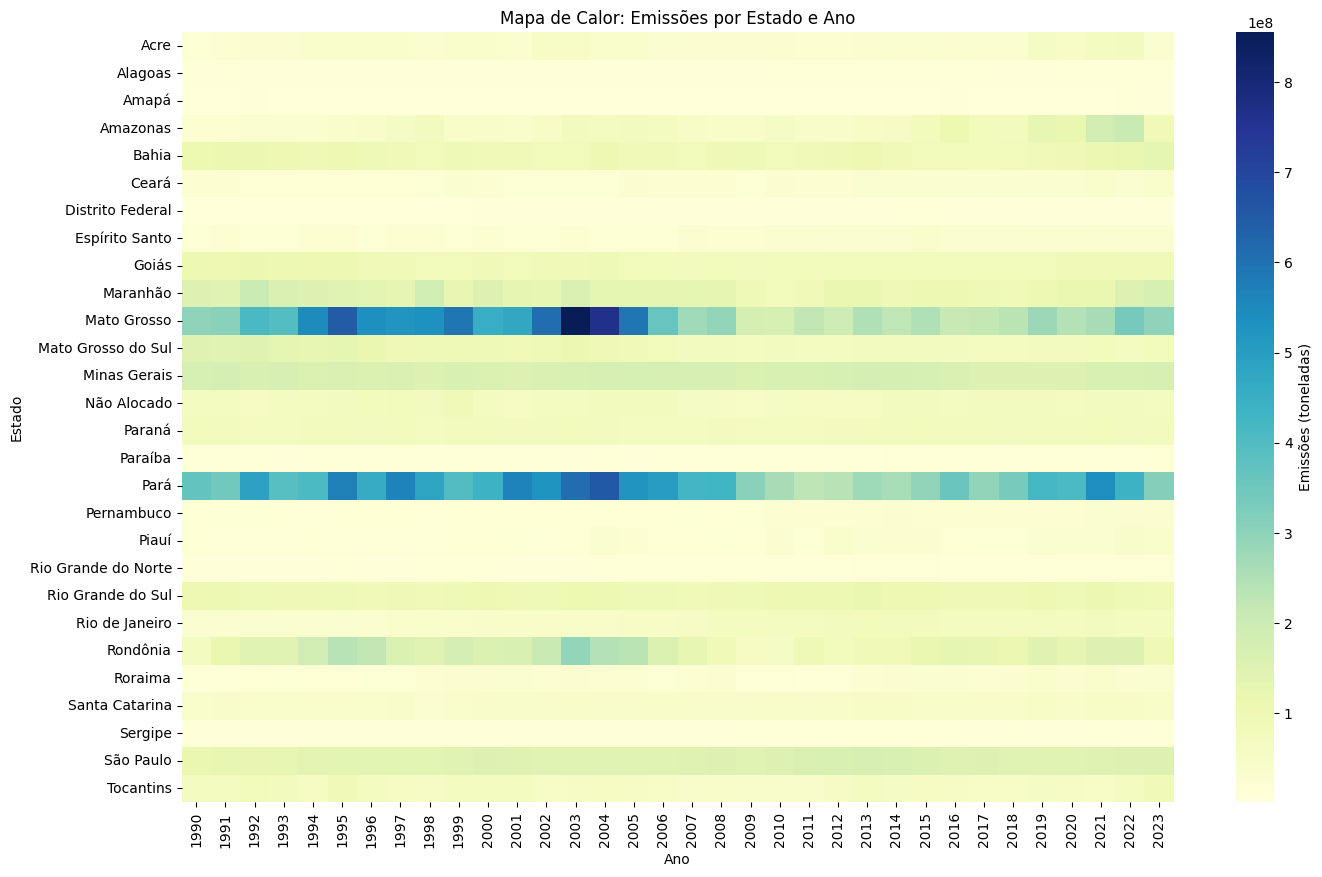

In [89]:
# Criar tabela dinâmica
heatmap_data = data_long.pivot_table(index="Categoria", columns="Ano", values="Emissao", aggfunc="sum")

# Plotar mapa de calor
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, cbar_kws={"label": "Emissões (toneladas)"})
plt.title("Mapa de Calor: Emissões por Estado e Ano")
plt.xlabel("Ano")
plt.ylabel("Estado")
plt.show()

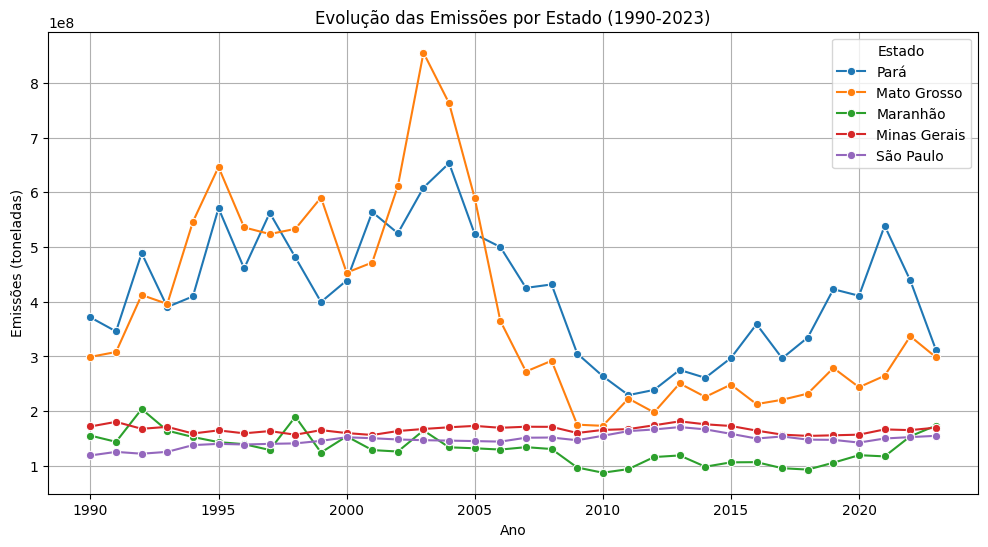

In [90]:
# Selecionar estados específicos
estados_selecionados = data_long[data_long["Categoria"].isin(["Pará", "Mato Grosso", "Maranhão", "Minas Gerais", "São Paulo"])]

# Plotar série temporal por estado
plt.figure(figsize=(12, 6))
sns.lineplot(data=estados_selecionados, x="Ano", y="Emissao", hue="Categoria", marker="o")
plt.title("Evolução das Emissões por Estado (1990-2023)")
plt.xlabel("Ano")
plt.ylabel("Emissões (toneladas)")
plt.grid()
plt.legend(title="Estado")
plt.show()

#### Variáveis principais:

Categoria: Estado (UF).

Ano: Anos de 1990 a 2023.

Emissões de GEE: Valores de emissão de gases de efeito estufa para cada estado por ano.

#### Características:

A emissão de GEE por estado é uma variável contínua que permite comparar os níveis de emissão entre os estados.

O período de 1990 a 2023 também é longo, permitindo observar tendências e mudanças nas emissões ao longo dos anos.

Pode ser interessante correlacionar os dados de emissões com as taxas de desmatamento, já que a queimada e o desmatamento impactam diretamente nas emissões de GEE.

#### Insights:

Identificar os estados com maiores contribuições para as emissões totais. Analisar o impacto de políticas ambientais ao longo dos anos. Cruzar os dados com outras bases (e.g., desmatamento ou queimadas) para encontrar relações causais.

## Base MapBiomas
### Análise - Desmatamento no Brasil

In [111]:
import pandas as pd

# Substitua pelo caminho para o seu arquivo
file_path = "MapBiomas-Tabela_de_Dados.csv"

# Carregar o arquivo Excel
data = pd.read_csv(file_path)

# Exibir as primeiras linhas para explorar o conteúdo
print(data.head())

                                 Classe  1986       1987       1988     1989  \
0    1. Supressão de Vegetação Primária   NaN  7308931.0  6432726.0  5749646   
1  2. Supressão de Vegetação Secundária   NaN        NaN        NaN   112426   

      1990     1991     1992     1993     1994  ...     2014     2015  \
0  4921199  4792157  5116605  4571184  4867557  ...  2329397  2437064   
1   206150   379203   616211   706388   808803  ...  1424841  1478782   

      2016     2017     2018     2019     2020     2021     2022     2023  
0  2365136  2141748  2259905  2985170  2941241  3409599  3608005  2480731  
1  1472338  1342547  1453311  1588832  1511754  1655177  1934253   957946  

[2 rows x 39 columns]


In [112]:
# Informações gerais sobre as colunas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Classe  2 non-null      object 
 1   1986    0 non-null      float64
 2   1987    1 non-null      float64
 3   1988    1 non-null      float64
 4   1989    2 non-null      int64  
 5   1990    2 non-null      int64  
 6   1991    2 non-null      int64  
 7   1992    2 non-null      int64  
 8   1993    2 non-null      int64  
 9   1994    2 non-null      int64  
 10  1995    2 non-null      int64  
 11  1996    2 non-null      int64  
 12  1997    2 non-null      int64  
 13  1998    2 non-null      int64  
 14  1999    2 non-null      int64  
 15  2000    2 non-null      int64  
 16  2001    2 non-null      int64  
 17  2002    2 non-null      int64  
 18  2003    2 non-null      int64  
 19  2004    2 non-null      int64  
 20  2005    2 non-null      int64  
 21  2006    2 non-null      int64  
 22  2007  

In [113]:
# Verificar estatísticas descritivas
print(data.describe())

       1986       1987       1988          1989          1990          1991  \
count   0.0        1.0        1.0  2.000000e+00  2.000000e+00  2.000000e+00   
mean    NaN  7308931.0  6432726.0  2.931036e+06  2.563674e+06  2.585680e+06   
std     NaN        NaN        NaN  3.986116e+06  3.334043e+06  3.120430e+06   
min     NaN  7308931.0  6432726.0  1.124260e+05  2.061500e+05  3.792030e+05   
25%     NaN  7308931.0  6432726.0  1.521731e+06  1.384912e+06  1.482442e+06   
50%     NaN  7308931.0  6432726.0  2.931036e+06  2.563674e+06  2.585680e+06   
75%     NaN  7308931.0  6432726.0  4.340341e+06  3.742437e+06  3.688918e+06   
max     NaN  7308931.0  6432726.0  5.749646e+06  4.921199e+06  4.792157e+06   

               1992          1993          1994          1995  ...  \
count  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  ...   
mean   2.866408e+06  2.638786e+06  2.838180e+06  3.186965e+06  ...   
std    3.182259e+06  2.732823e+06  2.869972e+06  3.112413e+06  ...   
min    6

In [116]:
# Transpor para formato longo (Ano e Desmatamento como variáveis)
data_long = data.melt(id_vars=["Classe"], 
                      var_name="Ano", 
                      value_name="Desmatamento")

# Converter Ano e Desmatamento para tipos adequados
data_long["Ano"] = pd.to_numeric(data_long["Ano"])
data_long["Desmatamento"] = pd.to_numeric(data_long["Desmatamento"], errors="coerce")

# Verificar os primeiros registros após a transformação
print(data_long.head())

                                 Classe   Ano  Desmatamento
0    1. Supressão de Vegetação Primária  1986           NaN
1  2. Supressão de Vegetação Secundária  1986           NaN
2    1. Supressão de Vegetação Primária  1987     7308931.0
3  2. Supressão de Vegetação Secundária  1987           NaN
4    1. Supressão de Vegetação Primária  1988     6432726.0


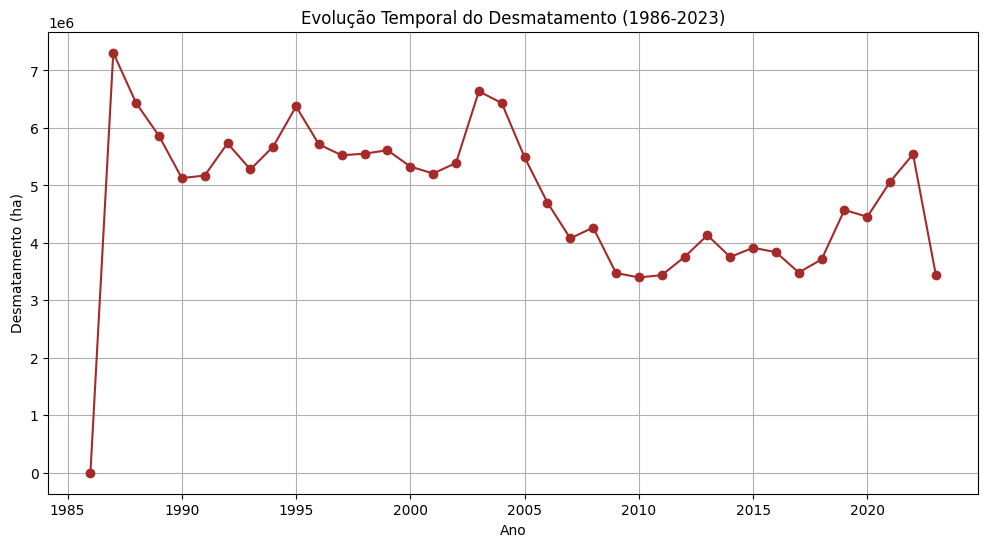

In [117]:
# Agrupar por ano e somar desmatamento total
desmatamento_tempo = data_long.groupby("Ano")["Desmatamento"].sum()

# Plotar gráfico de linha
plt.figure(figsize=(12, 6))
desmatamento_tempo.plot(kind="line", marker="o", color="brown")
plt.title("Evolução Temporal do Desmatamento (1986-2023)")
plt.xlabel("Ano")
plt.ylabel("Desmatamento (ha)")
plt.grid()
plt.show()


C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_1672\3875321600.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desmatamento_classe.index, y=desmatamento_classe.values, palette="Set2")


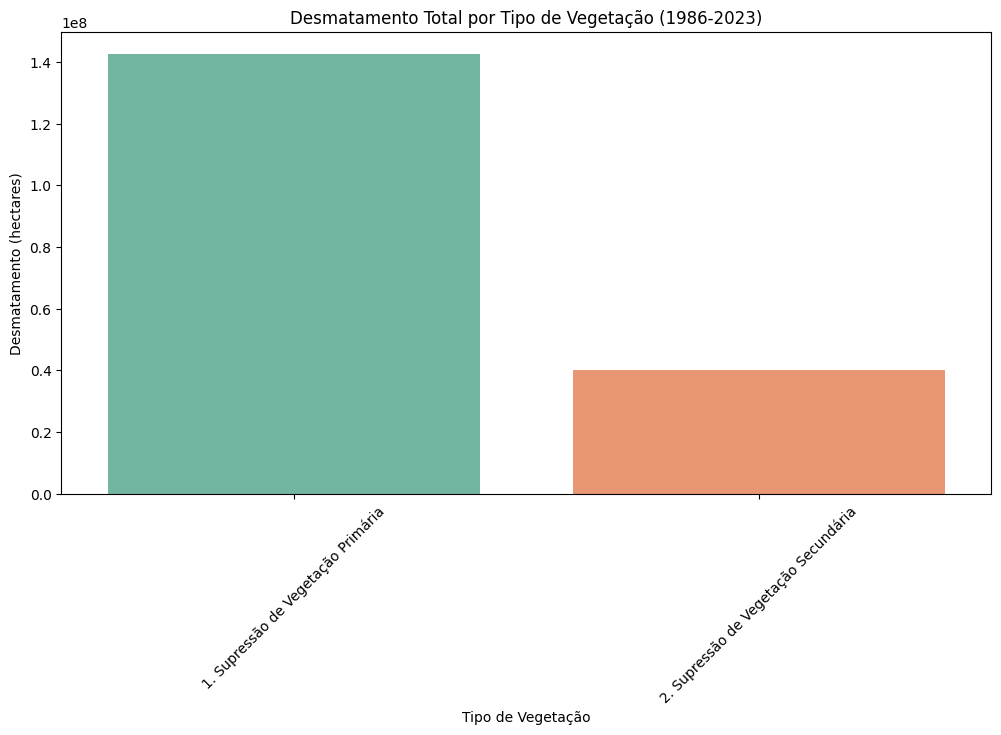

In [118]:
# Agrupar por tipo de vegetação e somar o desmatamento
desmatamento_classe = data_long.groupby("Classe")["Desmatamento"].sum().sort_values(ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=desmatamento_classe.index, y=desmatamento_classe.values, palette="Set2")
plt.title("Desmatamento Total por Tipo de Vegetação (1986-2023)")
plt.xlabel("Tipo de Vegetação")
plt.ylabel("Desmatamento (hectares)")
plt.xticks(rotation=45)
plt.show()

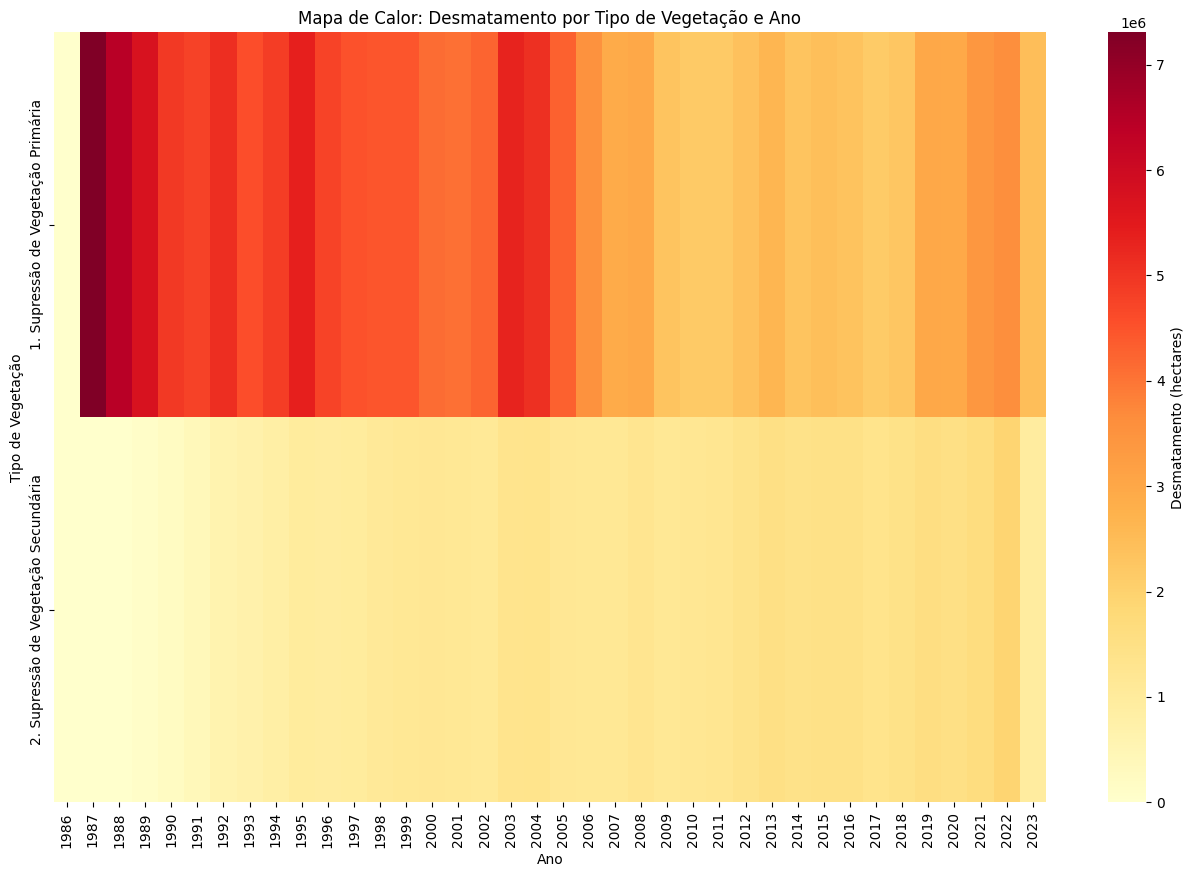

In [119]:
# Criar tabela dinâmica com desmatamento por ano e tipo de vegetação
heatmap_data = data_long.pivot_table(index="Classe", columns="Ano", values="Desmatamento", aggfunc="sum")

# Plotar mapa de calor
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=False, cbar_kws={"label": "Desmatamento (hectares)"})
plt.title("Mapa de Calor: Desmatamento por Tipo de Vegetação e Ano")
plt.xlabel("Ano")
plt.ylabel("Tipo de Vegetação")
plt.show()

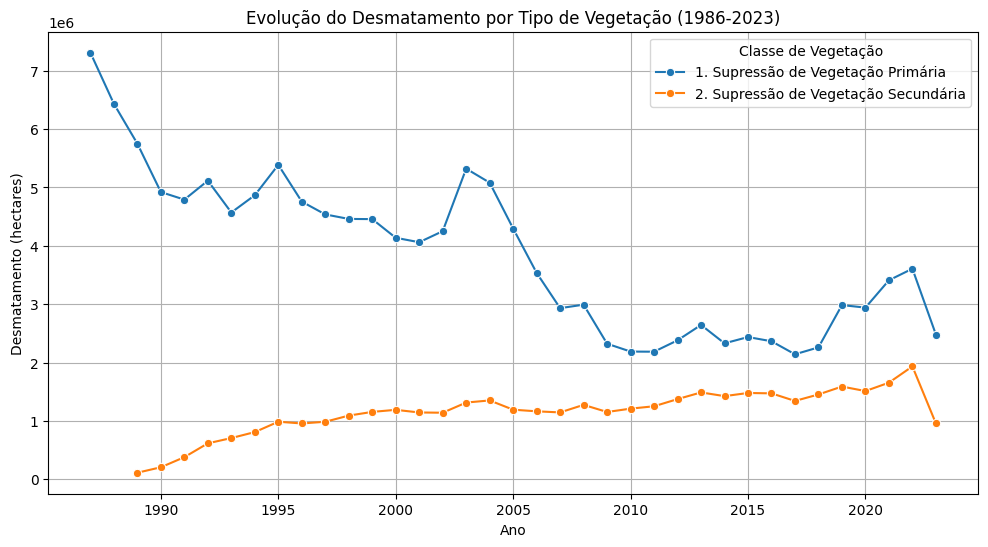

In [121]:
# Selecionar dados para vegetação primária e secundária
desmatamento_primaria_secundaria = data_long[data_long["Classe"].isin(["1. Supressão de Vegetação Primária", "2. Supressão de Vegetação Secundária"])]

# Plotar série temporal do desmatamento para primária e secundária
plt.figure(figsize=(12, 6))
sns.lineplot(data=desmatamento_primaria_secundaria, x="Ano", y="Desmatamento", hue="Classe", marker="o")
plt.title("Evolução do Desmatamento por Tipo de Vegetação (1986-2023)")
plt.xlabel("Ano")
plt.ylabel("Desmatamento (hectares)")
plt.grid()
plt.legend(title="Classe de Vegetação")
plt.show()

#### Variáveis principais:

Data: Ano e mês da ocorrência das queimadas.

Class: Tipo de queimada (por exemplo, florestal, agrícola).

Focuses: Número de focos de queimada por tipo.

UF: Unidade Federativa (estado).

#### Características:

A variável "Focos" fornece a quantidade de focos de incêndio, uma métrica importante para medir o impacto das queimadas.

A variável "Class" permite identificar os tipos de incêndios (florestais ou agrícolas), o que pode ajudar a analisar a origem das queimadas.

A dimensão temporal das queimadas (ano e mês) é importante para detectar tendências sazonais.

#### Insights:

Identificação de períodos críticos de desmatamento para cada tipo de vegetação. Avaliação da contribuição relativa do desmatamento de vegetação primária e secundária. Analisar se houve alguma redução ou aumento no desmatamento devido a mudanças nas políticas de conservação ou queimadas.

## Cruzamento de Bases

#### Essas bases podem ser analisadas juntas devido às seguintes características comuns:

Dimensão Temporal: Duas das três bases têm um período que se estende entre 1990 e 2023 (MapBiomas de 1986 a 2023, mas podemos considerar a parte comum de 1990-2023). Isso permite observar a evolução das variáveis ao longo do tempo.

Dimensão Geográfica (Estado/UF): Tanto o SEEG quanto as Queimadas possuem a variável UF, o que permite cruzar os dados geograficamente e analisar como diferentes estados impactam os resultados.

Relações Ambientais: O desmatamento e as queimadas estão diretamente relacionados à emissão de gases de efeito estufa. Portanto, podemos investigar como as variáveis de desmatamento e queimadas afetam as emissões de gases de efeito estufa nos estados.

## Perguntas e Objetivos

#### Qual é a correlação entre o desmatamento e a quantidade de focos de queimadas em cada estado ao longo dos anos?

Essa pergunta ajudaria a entender se um aumento no desmatamento está associado ao aumento das queimadas, o que é importante para políticas de controle de incêndios e desmatamento.

#### Como as emissões de gases de efeito estufa (GEE) estão relacionadas ao desmatamento e às queimadas por estado?

Isso permitiria identificar os estados que mais contribuem para as emissões de GEE devido ao desmatamento e queimadas, ajudando a priorizar ações em locais críticos.

####  Quais estados apresentam os maiores aumentos em desmatamento e queimadas ao longo do tempo, e como isso impacta suas emissões de GEE?

Uma análise temporal ajudaria a identificar tendências preocupantes e fornecer insights para ações preventivas ou corretivas.

####  Quais anos tiveram os maiores picos de desmatamento e queimadas e qual foi o impacto nas emissões de GEE?

Analisando os anos críticos, seria possível entender o impacto dessas crises ambientais nas emissões, ajudando a formar políticas de controle.